<a href="https://colab.research.google.com/github/DelfonteSimone/MLPNS2021_Delfonte/blob/main/MIDTERM_second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# these are all the packages I used. But depending on your choices you may need more or other ones. That is ok!

import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
from sklearn.cluster  import KMeans
import scipy.optimize


pl.rcParams['font.size'] = 18

In [2]:
from google.colab import drive
drive.mount('/MyDrive')

Drive already mounted at /MyDrive; to attempt to forcibly remount, call drive.mount("/MyDrive", force_remount=True).


In [3]:
cd /MyDrive/MyDrive/MLPNS

/MyDrive/MyDrive/MLPNS


In [4]:
datain=pd.read_excel("country_pop.xls")
datain.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,Last Updated Date,2021-03-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
4,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN


Adesso leggo il file exel in modo che sia più facile manipolarlo. Voglio:


* poter labellare le righe con i   nomi degli stati*   Voce elenco
* poter labellare le colonne con gli anni in cui sono state prese le misure
* eliminare i nan  Voce elenco




In [5]:
datain = pd.read_excel('country_pop.xls', index_col=0,usecols=[0] + list(range(4,100)), skiprows=[0,1,2])


In [6]:
datain = datain.drop('2020', 1)

In [7]:
datain.columns
datain

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733

In [8]:
np.sum(pd.isna(datain))
datain.shape

(264, 60)

In [9]:
datain = datain.dropna(axis=0, how='any')
datain.shape

(258, 60)

PLOTTO I DATI
 RISCALO I DATI IN MODO DA POTER OSSERVARE MEGLIO I TREND 
 PLOTTO ENTRAMBI PER MOSTRARE UN CONFRONTO


In [10]:
prodata = preprocessing.scale(datain, axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


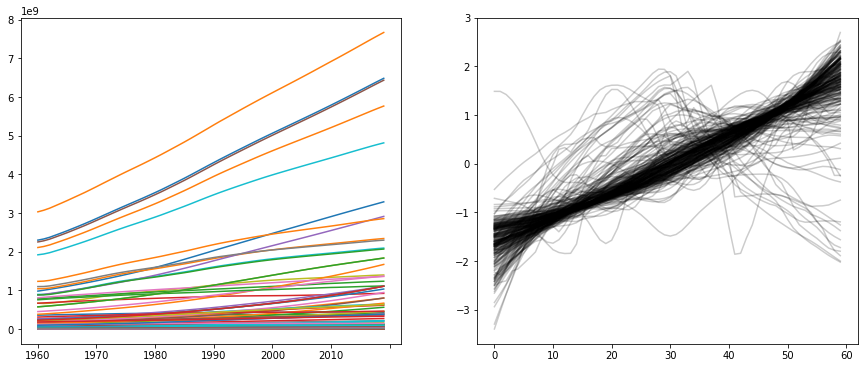

In [11]:
fig, axs = pl.subplots(1,2, figsize=(15,6))
ax1 = datain.T.plot(legend = False, ax=axs[0])
ax2 = pl.plot(prodata.T,c='k', alpha= 0.2)

Modellizzazione tramite polinomio di secondo grado.
cerco di minimizzare un L2

In [12]:
x = np.arange(prodata.shape[1])
prodata.shape

(258, 60)

In [13]:
def parab(a,b,c):
  return a*x**2+b*x+c 

In [14]:
def l2(par,prodata):
 a, b, c= par
 return sum((prodata-parab(a,b,c))**2)

In [15]:
ig=[1,1,1]

In [16]:
features = []
for t in prodata:
  fit = scipy.optimize.minimize(l2, ig, args=t)
  features.append([*fit.x, fit.fun])
features = np.array(features)  

CREAZIONE DEGLI ISTOGRAMMI DEI PARAMETRI DEL FITTING E DEL VALORE MINIMIZZATO DI l2

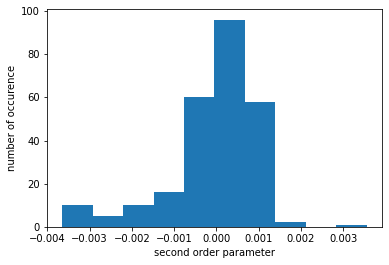

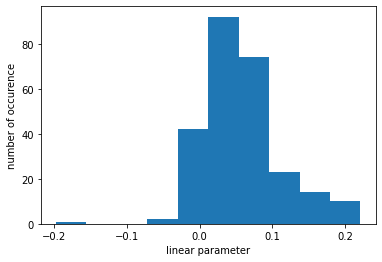

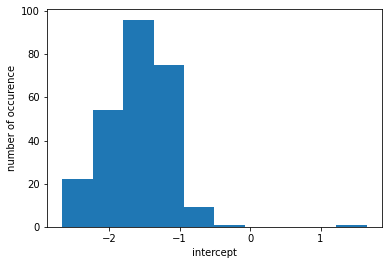

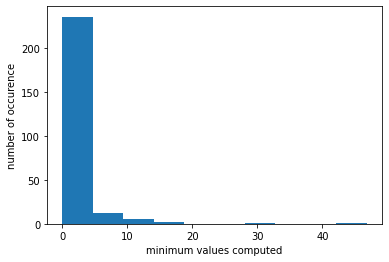

In [17]:

labels=['second order parameter','linear parameter','intercept','minimum values computed']
for t in range(0,4):
  pl.figure()
  pl.hist(features[:,t])
  pl.xlabel(labels[t])
  pl.ylabel('number of occurence')

In [18]:
profeatures = preprocessing.scale(features, axis=0)
profeatures.shape

(258, 4)

In [19]:
profeatures

array([[ 0.83299756, -0.92634147,  0.97595026,  0.59832937],
       [ 1.29074932, -1.46653416,  1.61948505, -0.07021878],
       [ 1.05798186, -1.16451364,  1.19815032, -0.35603068],
       ...,
       [ 0.15313636, -0.08360449, -0.11905348, -0.34241453],
       [ 0.71707377, -0.74866803,  0.67226613, -0.35150949],
       [-0.29498305,  0.41958566, -0.66077908, -0.18124524]])

SICCOME SONO PRESENTI NAN NON POSSO APPLICARE L ALGORITMO DI CLUSTERING, PERCIò DECIDO DI SOSTITUIRE TALI NAN CON I VALORI PIù PROBABILI PER OGNI FEATURES.


In [20]:
#sostituzione dei valori individuati con i nan
#for j in range(0,4):
 #profeatures[:,j] = np.nan_to_num(profeatures[:,j])

In [21]:
#profeatures = np.nan_to_num(profeatures)

In [22]:
klist=[]

In [23]:
for i in range(1,11):
  kk= KMeans(n_clusters=i,random_state=302).fit(profeatures[:,:3])
  klist.append(kk.inertia_)
Ncluster = np.linspace(1,11,10,dtype= int)

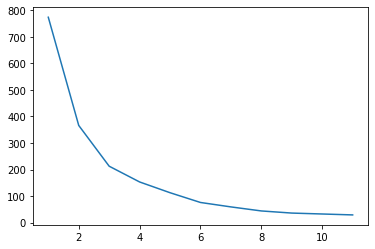

In [24]:
pl.plot(Ncluster,klist)

L'ELBOW PLOT NON MOSTRA ALCUN RAMO PIATTO CHE POSSA SUGGERIRE UN NUMERO OTTIMALE DI CLUSTERING, PER QUESTO LO PONGO IO UGUALE A 4

In [34]:
N_cluster = 4

In [35]:
k = KMeans(n_clusters=N_cluster,random_state= 302).fit(profeatures[:,:3])
centers = k.cluster_centers_
variance = k.inertia_

In [36]:
centers

array([[ 0.73193801, -0.77962926,  0.73936475],
       [-2.11904498,  2.01004037, -1.28991352],
       [-0.17296478,  0.26040885, -0.43697115],
       [ 3.43132193, -4.67938412,  6.99317824]])

In [37]:
#riscalo i centri dei cluster  e li normalizzo alle features di appartenenza.
procenters = []
for t in range(N_cluster):
  procenterss = centers[t]*features.std(axis=0)[:3]+features.mean(axis=0)[:3]
  procenters.append(procenterss)

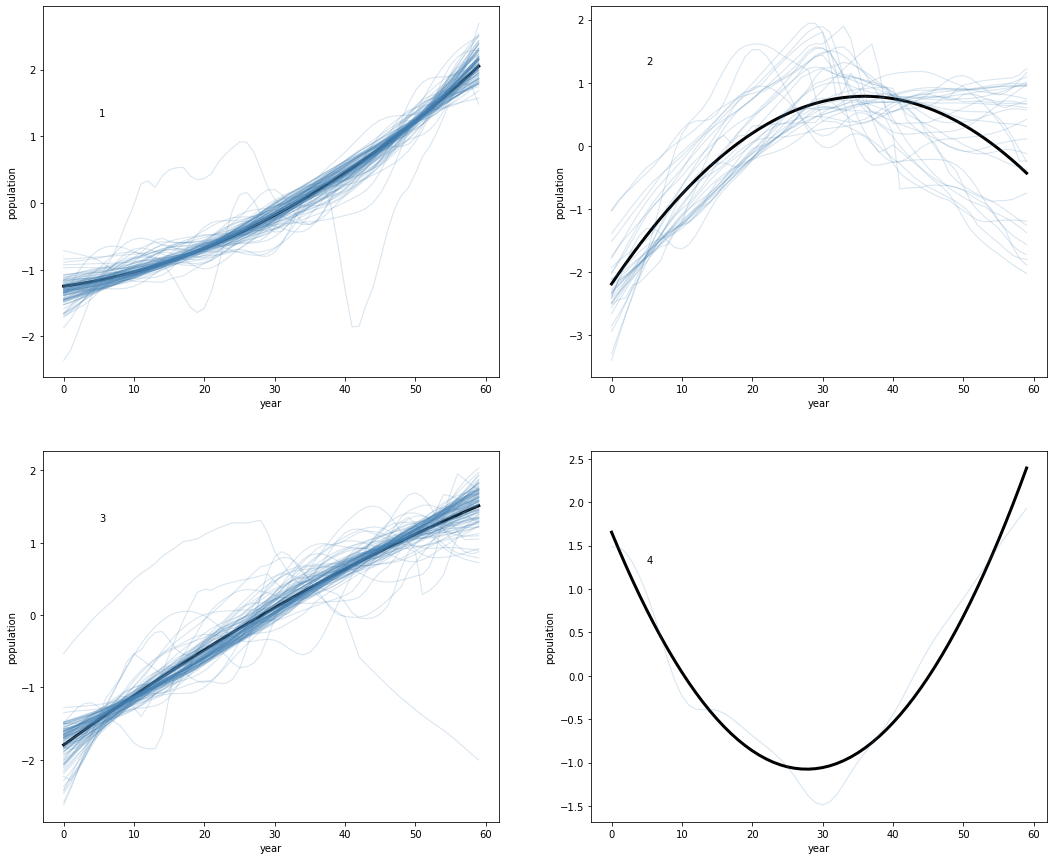

In [69]:
fig3 = pl.figure(figsize=(18,15))
axs3 = fig3.subplots(int(N_cluster/2+0.5),2)
axs3 = axs3.flatten()

for l in range(N_cluster):
#plot della parabola determinata dal centro appena calcolato
 axs3[l].plot(parab(procenters[l][0],procenters[l][1],procenters[l][2]), 'k', lw=3)
#plot della time series che appartiene a tale centro
 axs3[l].plot(prodata[k.labels_ == l].T,'steelblue',lw=1.1,alpha=0.2)
#impostazioni grafiche dei grafici
 axs3[l].set_xlabel('year')
 axs3[l].set_ylabel('population')
 axs3[l].text(5,1.3, l+1)
 #axs3[i].set_xticks(ticks=range(0, 70, 10))
 #axs3[i].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)])


In [39]:
#definisco una funzione che determina quanti elementi appartengono a ciascun cluster
def clustersize(KM):
  lista = []
  for i in range(KM.n_clusters):
   clust_lab_number = np.sum(KM.labels_== i)
   lista.append(clust_lab_number)
  return lista

In [40]:
#definisco una funzione che estrae i nomi delle time series in ogni cluster
def cluster_name_extraction(KM,cluster_label,data):
  res = data.index[KM.labels_ == cluster_label]
  return print(res)

In [41]:
clustersize(k)

[112, 31, 114, 1]

PROVO ORA A CLUSTERARE DIRETTAMENTE LE TIME SERIERS CON LO STESSO PACCHETTO

In [61]:
k_ts = KMeans(N_cluster, random_state=302).fit(prodata)

In [62]:
ts_center = k_ts.cluster_centers_
ts_variance = k_ts.inertia_
ts_labels = k_ts.labels_


In [76]:
ts_variance

605.3880733768184

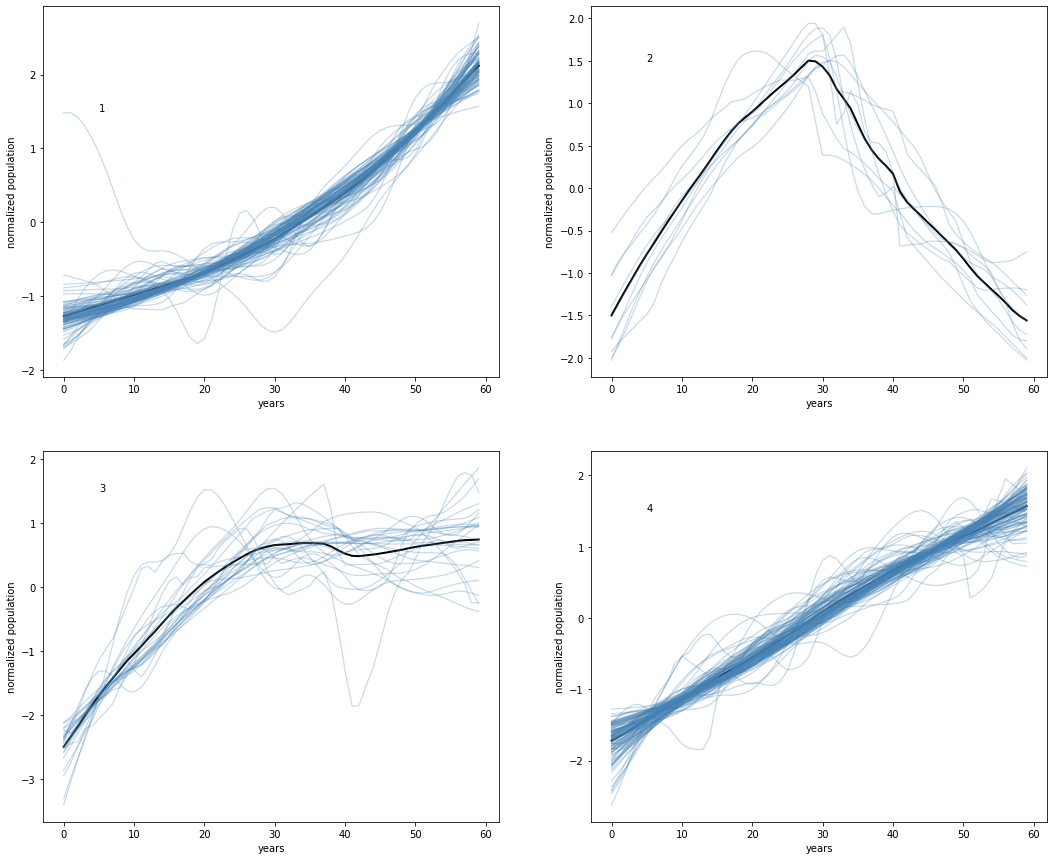

In [75]:
fig4 = pl.figure(figsize=(18,15))
axs4 = fig4.subplots(int(N_cluster/2+0.5),2)
axs4 = axs4.flatten()

for t in range(N_cluster):
  axs4[t].plot(ts_center[t].T, 'k',lw=2)
  axs4[t].plot(prodata[k_ts.labels_ == t].T,'steelblue',lw=1.2, alpha= 0.3)
  axs4[t].set_xlabel('years')
  axs4[t].set_ylabel('normalized population')
  axs4[t].text(5,1.5,t+1)

In [97]:
clustersize(k_ts)

[99, 10, 26, 123]

NEL CLUSTER 1 E 3 NOTO ALCUNE LINEE CHE SEMBRANO DISCOSTARSI MOLTO DAL CENTRO, VOGLIO VERIFICARE CHE SIA EFFETTIVAMENTE COSì.


*   SCRIVO UNA FUNZIONE CHE CALCOLA PER OGNI ANNO DI MISURAZIONR LA DISTANZA DI OGNI SERIE IN OGNI ANNO DAL CENTRO. LE SOMMO TUTTE  EVEDO QUALE HA SOMMA MAGGIORE
*   METTO TUTTO IN UN GRAFICO PER VEDERE SE EFFETTIVAMENTE IL PAESE TROVATO 'DISTA' TROPPO DAL CENTRO



In [82]:
def center_distance(KM,ts):
  centers = KM.cluster_centers_
  res=[]
  for k in range(KM.n_clusters):
   distances = (np.abs(ts[KM.labels_==k]-centers[k]))
   res.append(distances)
  return res

In [96]:
#distances è una list 'a doppio indice' il primo da 0 a 3 e labella i clusteril secondo va da zero al
#numero di elementi di goni cluster e raccoglie le distanze dal centro delle time seriers che ivi appartengono.
distances = center_distance(k_ts,prodata)


IndexError: ignored

In [102]:
#creo un datraframe di queste distanze
DFdistances = pd.DataFrame(distances,index=['cluster1','cluster2','cluster3','cluster4'],dtype=object)

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


,0
cluster1,"[[0.11602441032996036, 0.15204641843430977, 0...."
cluster2,"[[0.9686109608510829, 0.9406932277913451, 0.90..."
cluster3,"[[0.1799802961576802, 0.1302887124272556, 0.08..."
cluster4,"[[0.08981755137782033, 0.07616829690072513, 0...."


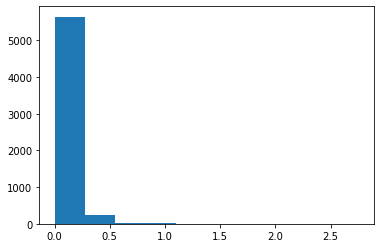

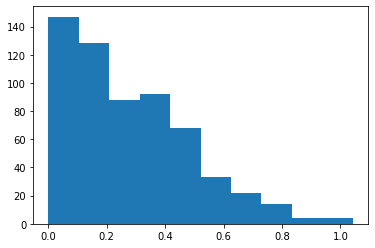

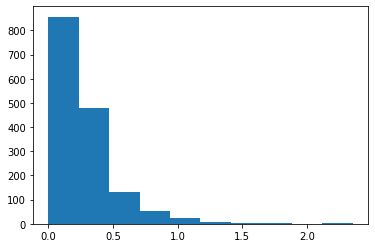

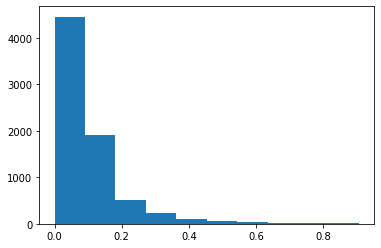

In [106]:
for j in range(N_cluster):
 pl.figure()
 pl.hist(DFdistances.iloc[j,:])

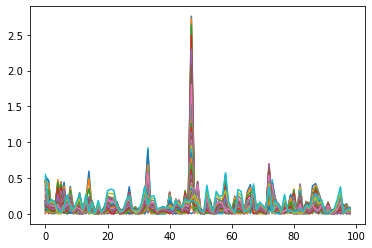

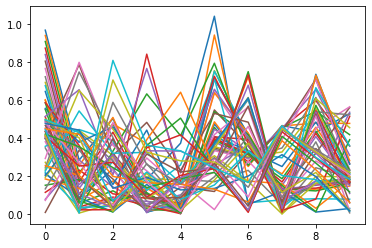

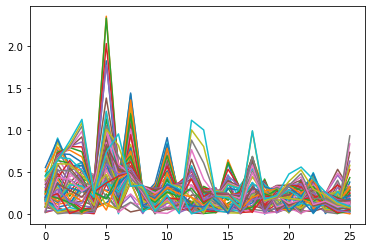

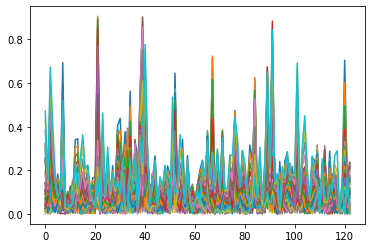

In [108]:
#provo a fare la stessa analisi ma con un plot
for j in range(N_cluster):
  pl.figure()
  pl.plot(distances[j])